# 2. Cleaning the Raw Data

### 2.1 Loading the raw_data.csv and then cleaning the DF

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../data/raw/raw_data.csv', index_col=0)

# Rename the columns
data = data.rename(columns={'BTC-USD': 'BTC', 'ETH-USD': 'ETH', 'GC=F': 'Gold', '^GSPC': 'S&P 500', '^IXIC': 'Nasdaq'})

# Make the column names lowercase
data.columns = data.columns.str.lower()

# Forward fill the missing values
data = data.fillna(method='ffill')

# Backward fill the remaining missing values
data = data.fillna(method='bfill')

data

,btc,eth,gold,s&p 500,nasdaq
Date,,,,,
2019-10-01,8343.276367,177.340424,1482.000000,2940.250000,7908.680176
2019-10-02,8393.041992,180.710510,1501.000000,2887.610107,7785.250000
2019-10-03,8259.992188,175.199341,1507.099976,2910.629883,7872.259766
2019-10-04,8205.939453,176.985001,1506.199951,2952.010010,7982.470215
2019-10-05,8151.500488,176.351517,1506.199951,2952.010010,7982.470215
...,...,...,...,...,...
2023-07-08,30292.541016,1865.539551,1926.199951,4398.950195,13660.719727
2023-07-09,30171.234375,1863.009766,1926.199951,4398.950195,13660.719727
2023-07-10,30414.470703,1880.556396,1925.000000,4409.529785,13685.480469


In [2]:
# Save the data to a CSV file
data.to_csv('../data/cleaned/cleaned_data_in_usd.csv')


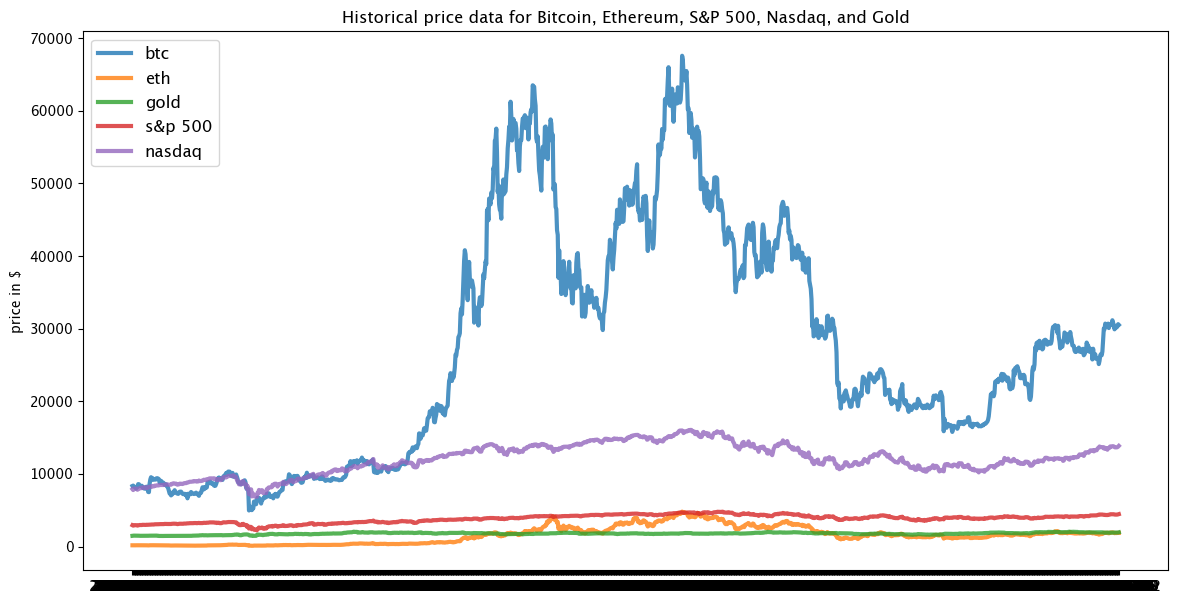

In [3]:
# Plot the data
plt.figure(figsize=(14, 7))
for c in data.columns.values:
    plt.plot(data.index, data[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')
plt.title('Historical price data for Bitcoin, Ethereum, S&P 500, Nasdaq, and Gold')
plt.show()

## Conclusion
The data for Bitcoin, Ethereum, S&P 500, Nasdaq, and Gold from October 2019 up until today has been successfully cleaned and plotted. The missing values have been filled using forward and backward filling methods to ensure continuity in the data. The plot provides a clear visualization of the price movements of these assets over the given time period. It's evident that the cryptocurrencies, Bitcoin and Ethereum, have shown significant price increases compared to the traditional assets.

### 2.2 Now to make the Data compareable in a Graph we have to show the relative change in % so that we understand the plot

In [5]:
# Calculate the relative change
data2 = data.copy()
relative_change = data2.pct_change()

# Drop the first row (which is NaN due to pct_change)
relative_change = relative_change.dropna()

# Save the relative change data to a CSV file
relative_change.to_csv('../data/cleaned/cleaned_data_relativepricechange_in_%.csv')

relative_change

,btc,eth,gold,s&p 500,nasdaq
Date,,,,,
2019-10-02,0.005965,0.019003,0.012821,-0.017903,-0.015607
2019-10-03,-0.015852,-0.030497,0.004064,0.007972,0.011176
2019-10-04,-0.006544,0.010192,-0.000597,0.014217,0.014000
2019-10-05,-0.006634,-0.003579,0.000000,0.000000,0.000000
2019-10-06,-0.020039,-0.018669,0.000000,0.000000,0.000000
...,...,...,...,...,...
2023-07-08,-0.001639,-0.002707,0.000000,0.000000,0.000000
2023-07-09,-0.004005,-0.001356,0.000000,0.000000,0.000000
2023-07-10,0.008062,0.009418,-0.000623,0.002405,0.001813


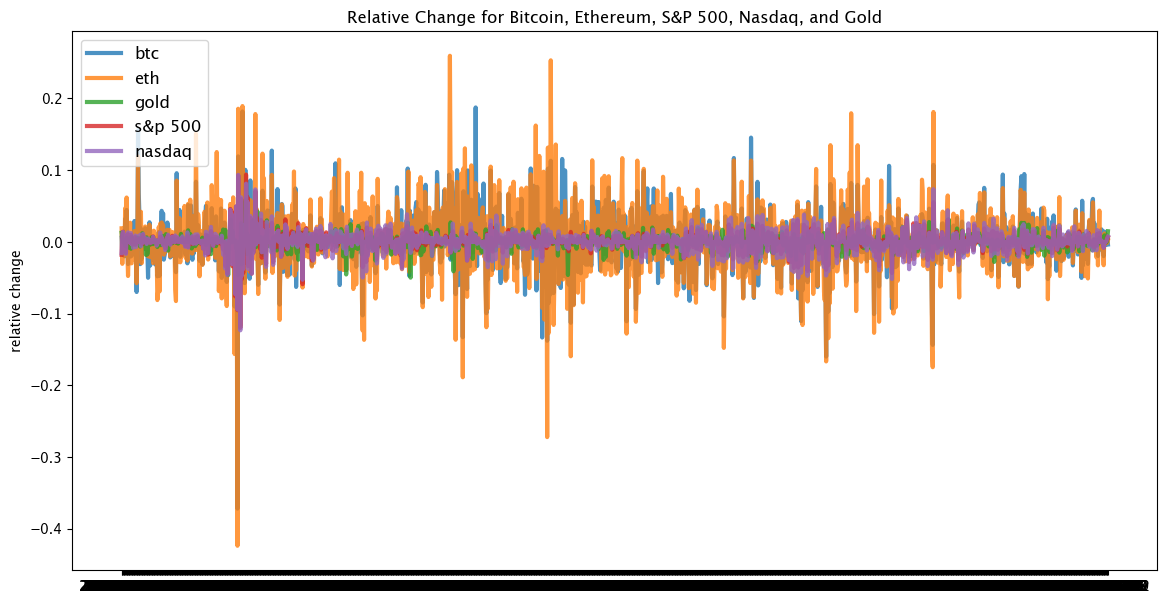

In [6]:
# Plot the relative change data
plt.figure(figsize=(14, 7))
for c in relative_change.columns.values:
    plt.plot(relative_change.index, relative_change[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('relative change')
plt.title('Relative Change for Bitcoin, Ethereum, S&P 500, Nasdaq, and Gold')
plt.show()

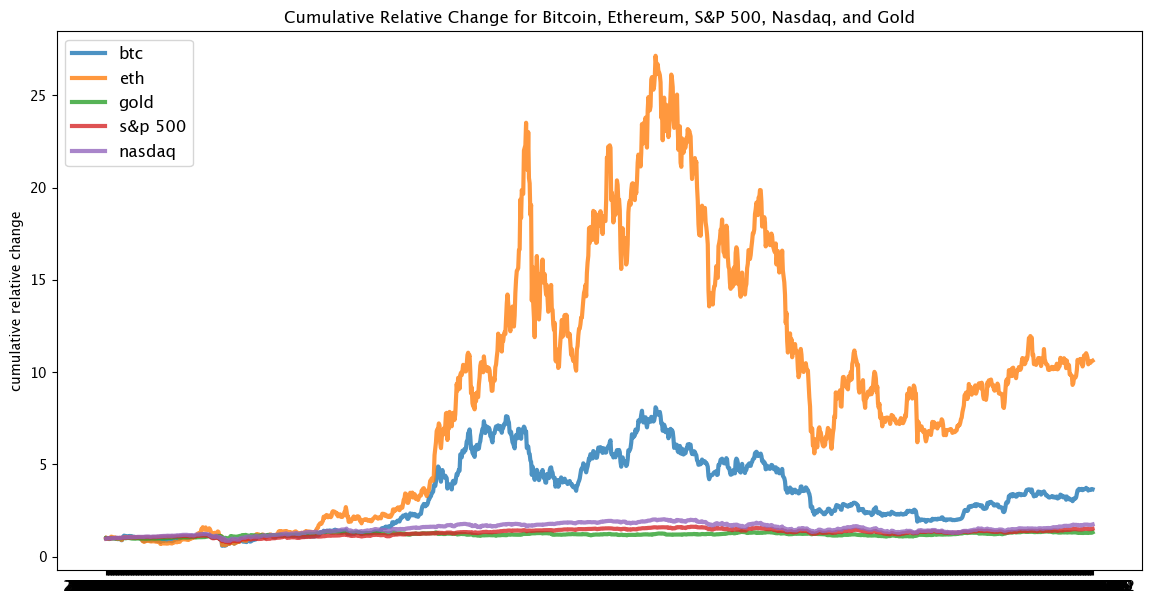

In [7]:
# Calculate the cumulative relative change
cumulative_change = (1 + relative_change).cumprod()

# Plot the cumulative relative change data
plt.figure(figsize=(14, 7))
for c in cumulative_change.columns.values:
    plt.plot(cumulative_change.index, cumulative_change[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('cumulative relative change')
plt.title('Cumulative Relative Change for Bitcoin, Ethereum, S&P 500, Nasdaq, and Gold')
plt.show()

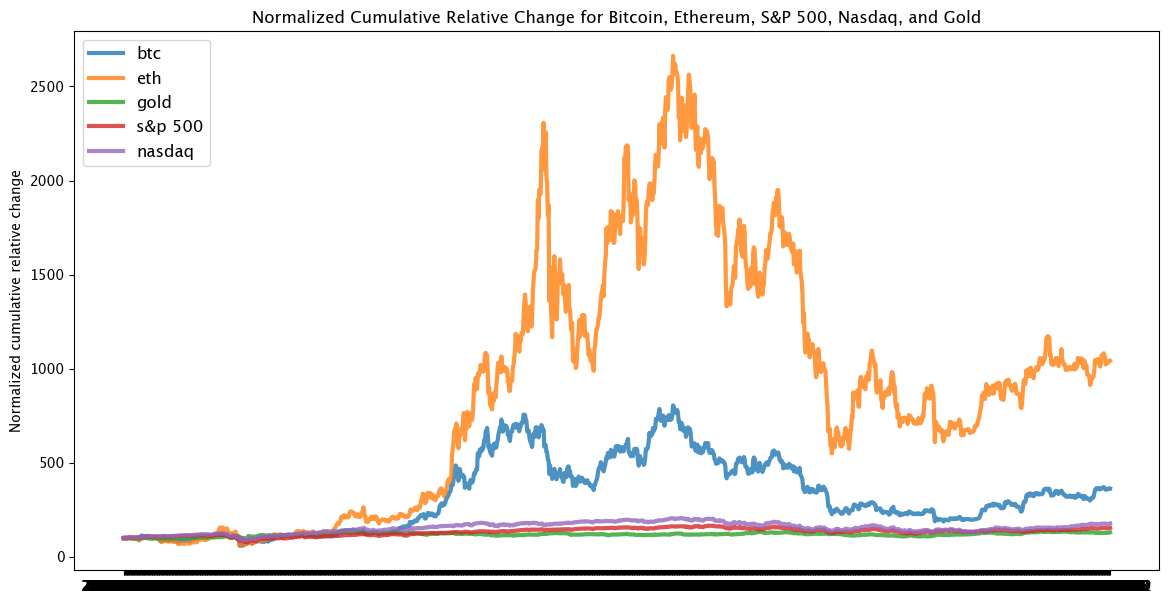

In [8]:
# Normalize the data
normalized_data = cumulative_change / cumulative_change.iloc[0] * 100

# Plot the normalized data
plt.figure(figsize=(14, 7))
for c in normalized_data.columns.values:
    plt.plot(normalized_data.index, normalized_data[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Normalized cumulative relative change')
plt.title('Normalized Cumulative Relative Change for Bitcoin, Ethereum, S&P 500, Nasdaq, and Gold')
plt.show()
